In [4]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
import sklearn as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
import pandas as pd

In [51]:
def confusionMatrix(confm, confmnorm, title, normtitle):
    classNames = ['positive', 'neutral', 'negative','mixed'] 
    ylabel = 'AWS label'
    xlabel = 'Azure label'
    
    plt.subplot(1,2,1)
    plt.imshow(confm, interpolation='nearest', cmap=plt.cm.Wistia)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    tick_marks = np.arange(len(classNames))

    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    
    for i in range(len(classNames)):
        for j in range(len(classNames)):
            plt.text(j-0.25,i, str(confm[i][j]))
    plt.subplots_adjust(bottom=0, right=1, top=0.8)
    
    plt.savefig("figure_{}.png".format(title), bbox_inches='tight')

    plt.subplot(1,2,2)

    plt.imshow(confmnorm, interpolation='nearest', cmap=plt.cm.Wistia)
    plt.title(normtitle)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    for i in range(len(classNames)):
        for j in range(len(classNames)):
            plt.text(j-0.25,i, str(confmnorm[i][j]))

    plt.subplots_adjust(bottom=0.1, right=1.6, top=0.9)
    plt.savefig("figure_{}.png".format(normtitle), bbox_inches='tight')
    plt.show()

In [6]:
def catnames_to_number(dataset):
    new_dataset = []
    for cat in dataset:
        if (cat == "positive"):
            new_dataset.append(0)
        elif (cat == "neutral"):
            new_dataset.append(1)
        elif (cat == "negative"):
            new_dataset.append(2)
        elif (cat == "mixed"):
            new_dataset.append(3)
        else :
            print("error in catnames_to_number")
    return new_dataset

In [33]:
df = pd.read_csv("dataset_analysis.csv", sep=";")
df.reset_index(drop=True, inplace=True)
df = df.drop(columns=[ "Unnamed: 0"])
print( df.head() )
#df.rename(aws_columns, axis="columns", inplace=True)

       textID                                               text sentiment  \
0  58674a6d03  is ready for a productive friday. one of the l...  positive   
1  818480ecfc   I couldn`t get used to the columns in tweetde...   neutral   
2  c7ff724662  Just got done watching Bedtime Stories! Love t...  positive   
3  c7b78c1b26  btw , , , and , i ordered some of yer merch ye...  positive   
4  84c5466055           Feels all kinds of not so well right now  negative   

   aws_obj_score  aws_mixed_score  aws_mixed_score.1  aws_neg_score  \
0       0.337490         0.000042           0.641027       0.021442   
1       0.068122         0.000050           0.013989       0.917838   
2       0.006338         0.000003           0.993252       0.000407   
3       0.684014         0.000004           0.315444       0.000537   
4       0.032808         0.160396           0.022582       0.784215   

   aws_final_score aws_pred_sent  azure_obj_score  ...  azure_pred_sent  \
0         0.619585      posit

In [9]:
y_actu = catnames_to_number(df["sentiment"])
aws_pred_sent = catnames_to_number(df["aws_pred_sent"])
azure_pred_sent = catnames_to_number(df["azure_pred_sent"])

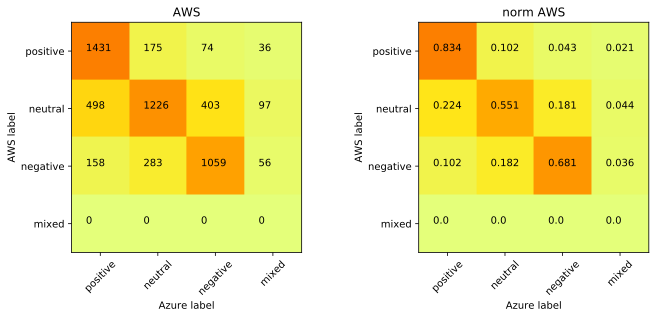

In [52]:
confm = confusion_matrix(y_actu, aws_pred_sent)
confmnorm = confusion_matrix(y_actu, aws_pred_sent,normalize='true').round(3)
confusionMatrix(confm, confmnorm, "AWS", "norm AWS")

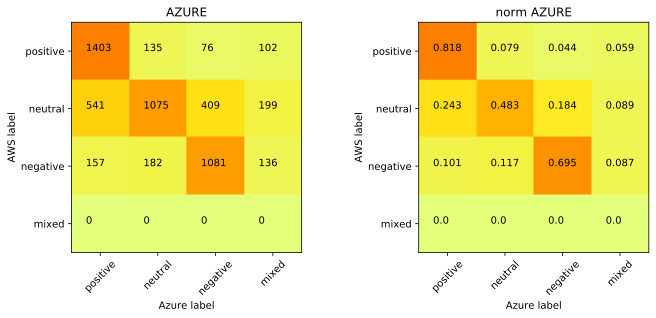

In [53]:
confm = confusion_matrix(y_actu, azure_pred_sent)
confmnorm = confusion_matrix(y_actu, azure_pred_sent,normalize='true').round(3)
confusionMatrix(confm, confmnorm, "AZURE", "norm AZURE")

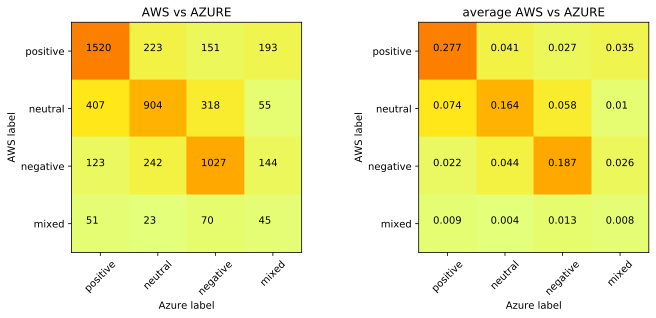

In [54]:
confm = confusion_matrix(aws_pred_sent, azure_pred_sent)
confmnorm = (confm/5496).round(3)
confusionMatrix(confm, confmnorm, "AWS vs AZURE", "average AWS vs AZURE")

In [24]:
print("*********************************************************************")
print("SENTIMENT value count")
print(df["sentiment"].value_counts())

print()
print("*********************************************************************")
print("AWS value count")
print(df["aws_pred_sent"].value_counts())

print()
print("*********************************************************************")
print("azure value count")
print(df["azure_pred_sent"].value_counts())

*********************************************************************
SENTIMENT value count
neutral     2224
positive    1716
negative    1556
Name: sentiment, dtype: int64

*********************************************************************
AWS value count
positive    2087
neutral     1684
negative    1536
mixed        189
Name: aws_pred_sent, dtype: int64

*********************************************************************
azure value count
positive    2101
negative    1566
neutral     1392
mixed        437
Name: azure_pred_sent, dtype: int64


In [25]:
print("##################################################################@@")
print("SENTIMENT vs azure value count")
print(df["sent_vs_azure"].value_counts())

print()
print("##################################################################@@")
print("SENTIMENT vs AWS value count")
print(df["sent_vs_aws"].value_counts())

print()
print("##################################################################@@")
print("AWS vs azure value count")
print(df["aws_vs_azure"].value_counts())

print()
print("##################################################################@@")
print("aws_vs_azure_mixed value count")
print(df["aws_vs_azure_mixed"].value_counts())

##################################################################@@
SENTIMENT vs azure value count
True     3559
False    1937
Name: sent_vs_azure, dtype: int64

##################################################################@@
SENTIMENT vs AWS value count
True     3716
False    1780
Name: sent_vs_aws, dtype: int64

##################################################################@@
AWS vs azure value count
True     3496
False    2000
Name: aws_vs_azure, dtype: int64

##################################################################@@
aws_vs_azure_mixed value count
False    5451
True       45
Name: aws_vs_azure_mixed, dtype: int64


In [27]:
print("=======================================================================")
print("all_true_sent value count")
print(df["all_true_sent"].value_counts())


print()
print("=======================================================================")
print("all_false_sent value count")
print(df["all_false_sent"].value_counts())

print()
print("=======================================================================")
print("same_but_false value count")
print(df["same_but_false"].value_counts())

all_true_sent value count
True     2866
False    2630
Name: all_true_sent, dtype: int64

all_false_sent value count
False    4409
True     1087
Name: all_false_sent, dtype: int64

same_but_false value count
False    4866
True      630
Name: same_but_false, dtype: int64


In [35]:
print(".........................................................................")
print("azure_t_vs_aws_f value count")
print(df["azure_t_vs_aws_f"].value_counts())

print()
print(".........................................................................")
print("aws true when azure is false value count")
print(df["aws_t_vs_azure_f"].value_counts()[False] ) 

.........................................................................
azure_t_vs_aws_f value count
False    4803
True      693
Name: azure_t_vs_aws_f, dtype: int64

.........................................................................
aws true when azure is false value count
4646


In [61]:
def confusionMatrixForThreeDs(true_mat , class_total = True, ordinates_total = True):
    classNames = ['positive' , 'neutral', 'negative'] 
    if (class_total):
        classNames.append('total')
        
    ordinates = ['both_true','aws_true','azure_true','both_false']
    if (ordinates_total):
        ordinates.append('total')
        
    ylabel = 'sentiment value'
    xlabel = 'Predicted label'
    title1 = 'Comparison of all three dataset'
    
    plt.imshow(true_mat, interpolation='nearest', cmap=plt.cm.Wistia)
    plt.title(title1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    x_tick_marks = np.arange(len(ordinates))
    y_tick_marks = np.arange(len(classNames))

    plt.xticks(x_tick_marks, ordinates, rotation=45)
    plt.yticks(y_tick_marks, classNames)
    
    for i in range(len(classNames)):
        for j in range(len(ordinates)):
            plt.text(j-0.25,i, str(true_mat[i][j]))
    plt.savefig("figure_mat_comp_norm.png", bbox_inches='tight')
    plt.show()

In [14]:
df_vc_tt = df.groupby('sentiment')['all_true_sent'].value_counts().loc[:,True]
df_vc_tf = df.groupby('sentiment')['aws_t_vs_azure_f'].value_counts().loc[:,True]
df_vc_ft = df.groupby('sentiment')['azure_t_vs_aws_f'].value_counts().loc[:,True]
df_vc_ff = df.groupby('sentiment')['all_false_sent'].value_counts().loc[:,True]

#df_vc_tt.loc["total"] = df_vc_tt.sum()
#df_vc_tf.loc["total"] = df_vc_tf.sum()
#df_vc_ft.loc["total"] = df_vc_ft.sum()
#df_vc_ff.loc["total"] = df_vc_ff.sum()

print(df_vc_tt)

sentiment
negative     844
neutral      783
positive    1239
Name: all_true_sent, dtype: int64


In [15]:
dataframe_ultime = pd.concat([df_vc_tt, df_vc_tf,df_vc_ft,df_vc_ff], axis=1)
#dataframe_ultime.loc["total"] = dataframe_ultime.sum()
#dataframe_ultime["total"] = dataframe_ultime.sum(axis=1)

In [16]:
def f(s):
    return s/s.sum()

norm_df = dataframe_ultime.apply(f, axis=1)
min_max_df=(dataframe_ultime-dataframe_ultime.min())/(dataframe_ultime.max()-dataframe_ultime.min())
normalized_df=(dataframe_ultime-dataframe_ultime.mean())/dataframe_ultime.std()

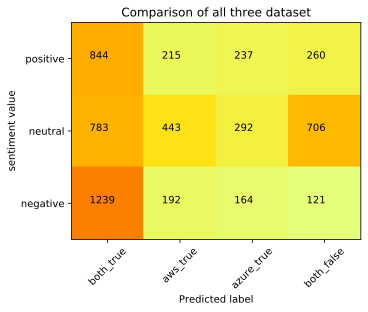

In [62]:
confusionMatrixForThreeDs(dataframe_ultime.to_numpy().round(2), False, False)

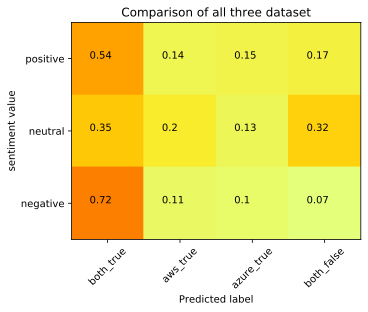

In [63]:
confusionMatrixForThreeDs(norm_df.to_numpy().round(2), False, False)